# Collaborative Filtering

## Movie_Recommendation_System_Using_Nearest_Neigbours



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

pd.set_option('display.max_columns', None)
import warnings 
warnings.filterwarnings('ignore')

In [26]:
from scipy.sparse import csr_matrix # too many zeros in the matrix
from sklearn.neighbors import NearestNeighbors # cosine_similarity metric

In [2]:
movies = pd.read_csv('data//movielens//movies.csv')
print('movies.shape : ',movies.shape)
movies.head()

movies.shape :  (9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings = pd.read_csv('data//movielens//ratings.csv')
print('ratings.shape : ',ratings.shape)
ratings.head()

ratings.shape :  (100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
data =  movies.merge(ratings,how = 'right',on =['movieId'])

In [5]:
data.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [7]:
data.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [8]:
movie_count = data.groupby('title')['title'].agg(['count']).sort_values(by='count',ascending = False)

In [9]:
movie_count

,count
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278
...,...
King Solomon's Mines (1950),1
King Solomon's Mines (1937),1
King Ralph (1991),1


In [10]:
data2 = data.merge(movie_count,how='left',on='title')
data2

,movieId,title,genres,userId,rating,timestamp,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247,52
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224,102
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,964983815,203
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931,204
...,...,...,...,...,...,...,...
100831,166534,Split (2017),Drama|Horror|Thriller,610,4.0,1493848402,6
100832,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,610,5.0,1493850091,7
100833,168250,Get Out (2017),Horror,610,5.0,1494273047,15
100834,168252,Logan (2017),Action|Sci-Fi,610,5.0,1493846352,25


<AxesSubplot:ylabel='Frequency'>

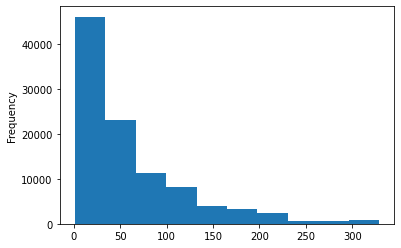

In [14]:
data2['count'].plot.hist()

In [15]:
movie_matrix_50 = data2[data2['count']>50].pivot_table(index='title',columns ='userId',values='rating').fillna(0)

In [45]:
data2[data2['count']>50]

,movieId,title,genres,userId,rating,timestamp,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215
1,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247,52
2,6,Heat (1995),Action|Crime|Thriller,1,4.0,964982224,102
3,47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,1,5.0,964983815,203
4,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,1,5.0,964982931,204
...,...,...,...,...,...,...,...
100657,106782,"Wolf of Wall Street, The (2013)",Comedy|Crime|Drama,610,4.5,1479542155,54
100672,109374,"Grand Budapest Hotel, The (2014)",Comedy|Drama,610,4.5,1493845137,52
100673,109487,Interstellar (2014),Sci-Fi|IMAX,610,3.5,1493845041,73
100701,112852,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,610,4.5,1493845402,59


In [16]:
movie_matrix_50.shape

(437, 606)

In [17]:
movie_matrix_50[:80]

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.

In [54]:
movie_map = movie_matrix_50.index#['title'].reset_index() 

In [55]:
movie_map

Index(['10 Things I Hate About You (1999)', '12 Angry Men (1957)',
       '2001: A Space Odyssey (1968)', '28 Days Later (2002)', '300 (2007)',
       '40-Year-Old Virgin, The (2005)', 'A.I. Artificial Intelligence (2001)',
       'Abyss, The (1989)', 'Ace Ventura: Pet Detective (1994)',
       'Ace Ventura: When Nature Calls (1995)',
       ...
       'Wild Wild West (1999)', 'Willy Wonka & the Chocolate Factory (1971)',
       'Wizard of Oz, The (1939)', 'Wolf of Wall Street, The (2013)',
       'X-Men (2000)', 'X-Men: The Last Stand (2006)',
       'X2: X-Men United (2003)', 'Young Frankenstein (1974)',
       'Zombieland (2009)', 'Zoolander (2001)'],
      dtype='object', name='title', length=437)

In [20]:
movie_matrix_50.index.get_loc('12 Angry Men (1957)')

1

In [42]:
movie_matrix_50.iloc[1].values.shape

(606,)

In [44]:
movie_matrix_50.iloc[1].values.reshape(1,-1).shape

(1, 606)

In [35]:
movie_matrix_array = csr_matrix(movie_matrix_50.values)

In [38]:
movie_matrix_array[]#.shape

<1x606 sparse matrix of type '<class 'numpy.float64'>'
	with 57 stored elements in Compressed Sparse Row format>

In [40]:
model_knn = NearestNeighbors(metric = 'cosine' ,algorithm='brute')
model_knn.fit(movie_matrix_array)

NearestNeighbors(algorithm='brute', metric='cosine')

In [47]:
distances , indices = model_knn.kneighbors(movie_matrix_50.iloc[1].values.reshape(1,-1),n_neighbors=6)

In [60]:
distances[0]

array([0.        , 0.59553693, 0.61265857, 0.61814687, 0.62013789,
       0.62491882])

In [57]:
indices[0]

array([  1, 294,  79, 217, 288, 393], dtype=int64)

In [61]:
for i,j in zip(indices[0],distances[0]):
    print(movie_map[i],'   ',j)

12 Angry Men (1957)     0.0
One Flew Over the Cuckoo's Nest (1975)     0.5955369335137186
Casablanca (1942)     0.6126585689464474
It's a Wonderful Life (1946)     0.6181468690645637
North by Northwest (1959)     0.6201378918717146
To Kill a Mockingbird (1962)     0.6249188203887648


In [62]:
dict(zip(indices[0],distances[0]))

{1: 0.0,
 294: 0.5955369335137186,
 79: 0.6126585689464474,
 217: 0.6181468690645637,
 288: 0.6201378918717146,
 393: 0.6249188203887648}

In [73]:
def reccommend(title):
    movie_index = movie_matrix_50.index.get_loc(title)
    movie_row = movie_matrix_50.iloc[movie_index].values.reshape(1,-1)
    distances , indices = model_knn.kneighbors(movie_row ,n_neighbors=6)
    
    row_index = 0
    rec_df = pd.DataFrame()
    for i,j in zip(indices[0],distances[0]):
        rec_df.loc[row_index,'movie'] =movie_map[i]
        rec_df.loc[row_index,'cosine_distance'] =  np.round(j,4)
        row_index+=1
    display(rec_df.style.background_gradient(cmap='summer_r'))       

In [68]:
def search_title(movie):
    return set([ i for i in data.title if movie in i])

In [79]:
reccommend(title =  '12 Angry Men (1957)')

,movie,cosine_distance
0,12 Angry Men (1957),0.000000
1,One Flew Over the Cuckoo's Nest (1975),0.595500
2,Casablanca (1942),0.612700
3,It's a Wonderful Life (1946),0.618100
4,North by Northwest (1959),0.620100
5,To Kill a Mockingbird (1962),0.624900


In [69]:
search_title(movie='Toy')

{'Babes in Toyland (1934)',
 'Babes in Toyland (1961)',
 'Toy Soldiers (1991)',
 'Toy Story (1995)',
 'Toy Story 2 (1999)',
 'Toy Story 3 (2010)',
 'Toy, The (1982)',
 'Toys (1992)'}

In [74]:
reccommend(title =  'Toy Story (1995)')

,movie,cosine_distance
0,Toy Story (1995),0.000000
1,Toy Story 2 (1999),0.427400
2,Jurassic Park (1993),0.434400
3,Independence Day (a.k.a. ID4) (1996),0.435700
4,Star Wars: Episode IV - A New Hope (1977),0.442600
5,Forrest Gump (1994),0.452900


In [75]:
search_title(movie='Star Wars')

{"Empire of Dreams: The Story of the 'Star Wars' Trilogy (2004)",
 'Rogue One: A Star Wars Story (2016)',
 'Solo: A Star Wars Story (2018)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Star Wars: Episode II - Attack of the Clones (2002)',
 'Star Wars: Episode III - Revenge of the Sith (2005)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Star Wars: Episode VII - The Force Awakens (2015)',
 'Star Wars: The Clone Wars (2008)',
 'Star Wars: The Last Jedi (2017)',
 'The Star Wars Holiday Special (1978)'}

In [76]:
reccommend(title =  'Star Wars: Episode I - The Phantom Menace (1999)')

,movie,cosine_distance
0,Star Wars: Episode I - The Phantom Menace (1999),0.000000
1,Star Wars: Episode V - The Empire Strikes Back (1980),0.372200
2,Men in Black (a.k.a. MIB) (1997),0.377900
3,Star Wars: Episode VI - Return of the Jedi (1983),0.384000
4,Star Wars: Episode IV - A New Hope (1977),0.395600
5,Star Wars: Episode II - Attack of the Clones (2002),0.398300


In [77]:
search_title(movie='Shawshank')

{'Shawshank Redemption, The (1994)'}

In [78]:
reccommend(title =  'Shawshank Redemption, The (1994)')

,movie,cosine_distance
0,"Shawshank Redemption, The (1994)",0.000000
1,Forrest Gump (1994),0.287000
2,Pulp Fiction (1994),0.297600
3,"Silence of the Lambs, The (1991)",0.352900
4,"Usual Suspects, The (1995)",0.368200
5,Schindler's List (1993),0.370900


In [81]:
reccommend(title =  'Schindler\'s List (1993)')

,movie,cosine_distance
0,Schindler's List (1993),0.000000
1,"Shawshank Redemption, The (1994)",0.370900
2,Forrest Gump (1994),0.397900
3,"Silence of the Lambs, The (1991)",0.408500
4,Pulp Fiction (1994),0.428800
5,Saving Private Ryan (1998),0.447500


In [82]:
search_title(movie='Heat')

{'Body Heat (1981)',
 'City Heat (1984)',
 'Dead Heat (1988)',
 'Heat (1995)',
 'Heat, The (2013)',
 'Heathers (1989)',
 'In the Heat of the Night (1967)',
 'Red Heat (1988)',
 'White Heat (1949)'}

In [83]:
reccommend(title =  'Heat (1995)')

,movie,cosine_distance
0,Heat (1995),0.000000
1,"Rock, The (1996)",0.477200
2,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),0.489300
3,Léon: The Professional (a.k.a. The Professional) (Léon) (1994),0.502900
4,Casino (1995),0.507200
5,Fargo (1996),0.514100


In [84]:
reccommend(title =  'Inception (2010)')

,movie,cosine_distance
0,Inception (2010),0.000000
1,"Dark Knight, The (2008)",0.272700
2,Inglourious Basterds (2009),0.353900
3,Shutter Island (2010),0.382300
4,"Dark Knight Rises, The (2012)",0.382500
5,Fight Club (1999),0.384600


In [85]:
reccommend(title =  'Dark Knight, The (2008)')

,movie,cosine_distance
0,"Dark Knight, The (2008)",0.000000
1,Inception (2010),0.272700
2,Iron Man (2008),0.329500
3,"Dark Knight Rises, The (2012)",0.333900
4,Batman Begins (2005),0.348700
5,"Lord of the Rings: The Return of the King, The (2003)",0.379400


In [86]:
reccommend(title =  'Lord of the Rings: The Return of the King, The (2003)')

,movie,cosine_distance
0,"Lord of the Rings: The Return of the King, The (2003)",0.000000
1,"Lord of the Rings: The Two Towers, The (2002)",0.117700
2,"Lord of the Rings: The Fellowship of the Ring, The (2001)",0.125600
3,Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.313300
4,"Incredibles, The (2004)",0.353800
5,"Matrix, The (1999)",0.359800


In [87]:
reccommend(title =  'Matrix, The (1999)')

,movie,cosine_distance
0,"Matrix, The (1999)",0.000000
1,Fight Club (1999),0.286100
2,Star Wars: Episode V - The Empire Strikes Back (1980),0.299100
3,Saving Private Ryan (1998),0.320400
4,Star Wars: Episode IV - A New Hope (1977),0.336600
5,Star Wars: Episode VI - Return of the Jedi (1983),0.339000


In [88]:
reccommend(title =  'Full Metal Jacket (1987)')

,movie,cosine_distance
0,Full Metal Jacket (1987),0.000000
1,Reservoir Dogs (1992),0.351800
2,Apocalypse Now (1979),0.355000
3,"Clockwork Orange, A (1971)",0.419000
4,Goodfellas (1990),0.428300
5,Blade Runner (1982),0.449300


In [89]:
reccommend(title =  'Slumdog Millionaire (2008)')

,movie,cosine_distance
0,Slumdog Millionaire (2008),0.000000
1,"Dark Knight, The (2008)",0.509200
2,Avatar (2009),0.509400
3,Inception (2010),0.516000
4,WALL·E (2008),0.518800
5,Catch Me If You Can (2002),0.520000


In [90]:
reccommend(title =  'Braveheart (1995)')

,movie,cosine_distance
0,Braveheart (1995),0.000000
1,Jurassic Park (1993),0.330500
2,Terminator 2: Judgment Day (1991),0.340200
3,"Fugitive, The (1993)",0.354600
4,Forrest Gump (1994),0.356900
5,Pulp Fiction (1994),0.372400


In [91]:
search_title(movie='Saving')

{'Saving Christmas (2014)',
 'Saving Face (2004)',
 'Saving Grace (2000)',
 'Saving Mr. Banks (2013)',
 'Saving Private Ryan (1998)',
 'Saving Santa (2013)',
 'Saving Silverman (Evil Woman) (2001)'}

In [92]:
reccommend(title =  'Saving Private Ryan (1998)')

,movie,cosine_distance
0,Saving Private Ryan (1998),0.000000
1,"Matrix, The (1999)",0.320400
2,"Sixth Sense, The (1999)",0.383700
3,Star Wars: Episode VI - Return of the Jedi (1983),0.384500
4,Star Wars: Episode V - The Empire Strikes Back (1980),0.393800
5,Star Wars: Episode IV - A New Hope (1977),0.407200
